# check velocity across the experiment

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

from dataloader.dataset import BaseDataset
from util import cal_velocity
from param import *


In [2]:
vel_all = []
for data_dir in ParamDir().data_list:
    dataset = BaseDataset(data_dir, ParamData().mobility, ParamData().shuffle, ParamData().random_state)
    data_name = str(data_dir).split('/')[-1]
    mouse_type = "KO" if "KO" in data_name else "WT"

    vel = cal_velocity(dataset.coords_xy)
    for v_i in vel:
        vel_all.append([v_i, data_name, mouse_type])

plot_data = pd.DataFrame(vel_all, columns=["velocity", "data name", "mouse type"])

## T test

In [3]:
stats.ttest_ind(plot_data[plot_data["mouse type"]=="KO"]["velocity"].values, 
                plot_data[plot_data["mouse type"]=="WT"]["velocity"].values)

Ttest_indResult(statistic=50.89980560951953, pvalue=0.0)

## Plot

In [4]:
def label_diff(i,j,text,ind,Y, errors, ax, barh):
    y = 1.1*max(Y[i]+errors[i], Y[j]+errors[j])

    lx, rx = ind[i], ind[j]
    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]

    kwargs = dict(ha='center', va='bottom')
    mid = ((lx+rx)/2, y+barh)

    ax.plot(barx, bary, c='black')
    ax.text(*mid, text, **kwargs)


Text(0.5, 0.98, 'Velocity (KO>WT)')

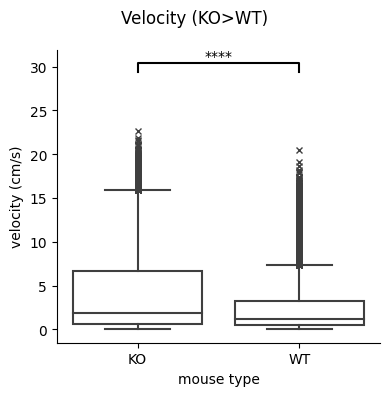

In [5]:
ind = range(len(plot_data))
means = plot_data.groupby("mouse type")["velocity"].mean()
errors = plot_data.groupby("mouse type")["velocity"].max()

fig, ax = plt.subplots(figsize=(4,4),sharey=True, tight_layout=True)
sns.despine()

sns.boxplot(
    x="mouse type", 
    y="velocity", 
    boxprops={"facecolor": (0, 0, 0, 0)}, 
    data=plot_data, 
    flierprops={"marker": "x"}, 
    ax=ax
    )

ax.set_xlabel("mouse type")
ax.set_ylabel("velocity (cm/s)")
label_diff(0, 1, "****", ind=ind, Y=means, errors=errors, ax=ax, barh=1)

plt.suptitle("Velocity (KO>WT)")